In [67]:
!pip install feedparser
!pip install beautifulsoup4
!pip install janome

In [29]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 2s (5,161 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121926 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [70]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import feedparser
import pandas as pd
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import re

In [30]:
FONT_PATH = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

In [22]:
def get_word_str(text):
    t = Tokenizer()
    token = t.tokenize(text)
    word_list = []

    for line in token:
        tmp = re.split('\t|,', str(line))
        # 名詞のみ対象
        if tmp[1] in ["名詞"]:
            # さらに絞り込み
            if tmp[2] in ["一般", "固有名詞"]:
                word_list.append(tmp[0])

    return " " . join(word_list)

In [89]:
# RSSフィードのURL
RSS_URL = "https://ray-memo.blogspot.com/rss.xml"
d = feedparser.parse(RSS_URL)

word_str = ""

# 各エントリの説明を処理
for entry in d.entries:
    if hasattr(entry, 'description'):
        # HTMLタグの除去
        soup = BeautifulSoup(entry.description, 'html.parser')
        text = soup.get_text()
        # 特殊文字や記号の除去
        text = re.sub(r'[^\w\s]', '', text)
        # 名詞の抽出
        word_str += " " + get_word_str(entry.description)

In [90]:
wc = WordCloud(background_color='white',font_path=FONT_PATH, max_font_size=75, width=960,height=640, max_words=80).generate(word_str)

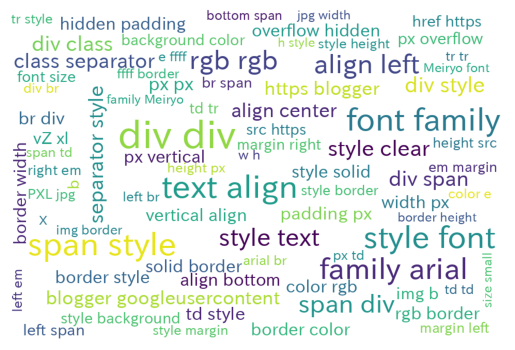

In [91]:
plt.imshow(wc)
plt.axis('off')
plt.show()